# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [10]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [11]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)


In [12]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

In [13]:
df_blobs.head()

,x1,x2,y
0,-0.136220,-7.495898,0
1,5.503736,6.175755,2
2,-3.314304,-0.952147,1
3,1.030302,-7.547348,0
4,-0.089175,-6.899298,0


In [14]:
df_centers.head()

,x1,x2
0,1.268901,-6.942453
1,-3.392179,0.263651
2,4.390148,6.933138
3,-8.495698,7.826456


## Visualización de datos

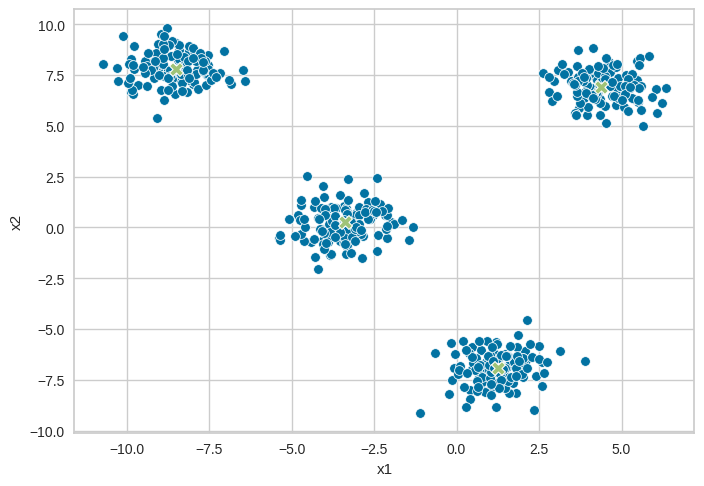

In [15]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [18]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X) # entrenamiento y creacion de un dataframe
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_ #identifica los centroides 
df_k_means_center = pd.DataFrame( # se crea el dataframe con los centroides
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)

/home/garceseder2/anaconda3/envs/regresion_lineal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


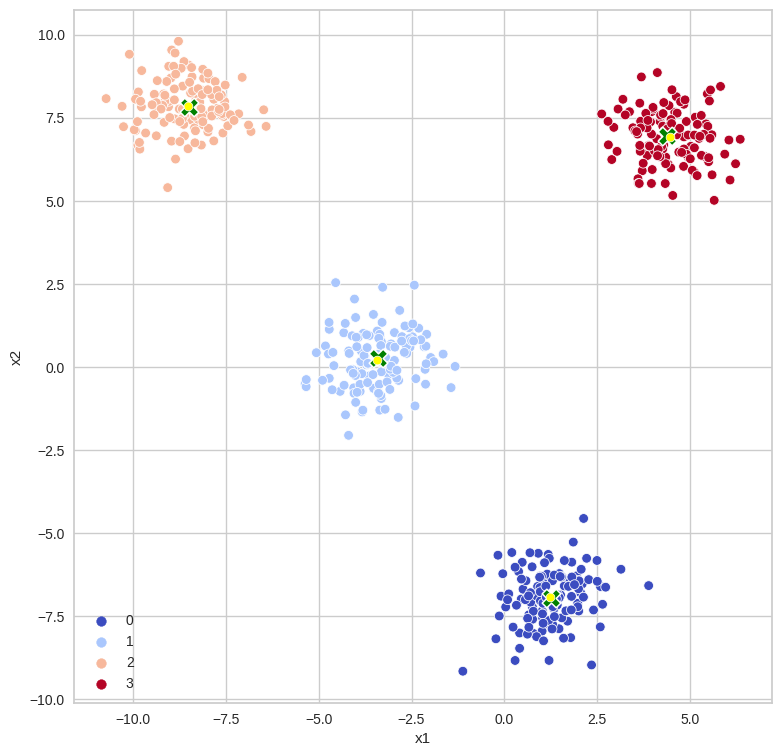

In [23]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=180 , color='green')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=40 , color='yellow')
plt.show()


In [24]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


/home/garceseder2/anaconda3/envs/regresion_lineal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


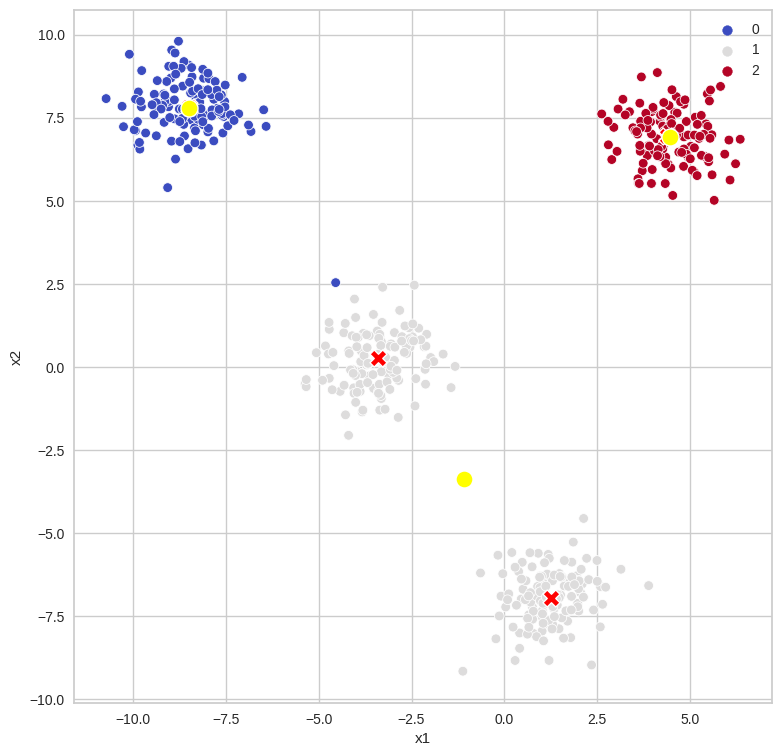

4


/home/garceseder2/anaconda3/envs/regresion_lineal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


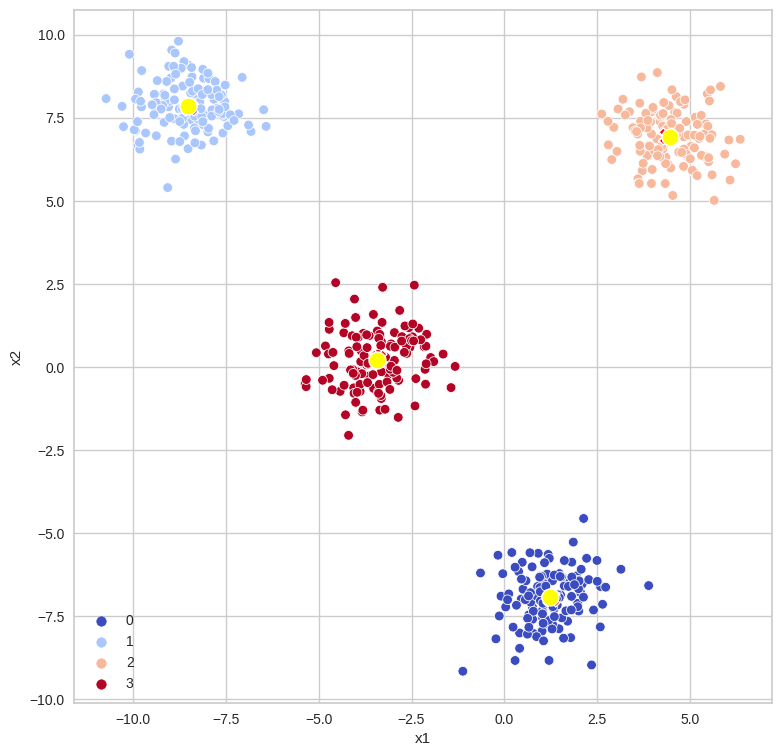

5


/home/garceseder2/anaconda3/envs/regresion_lineal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


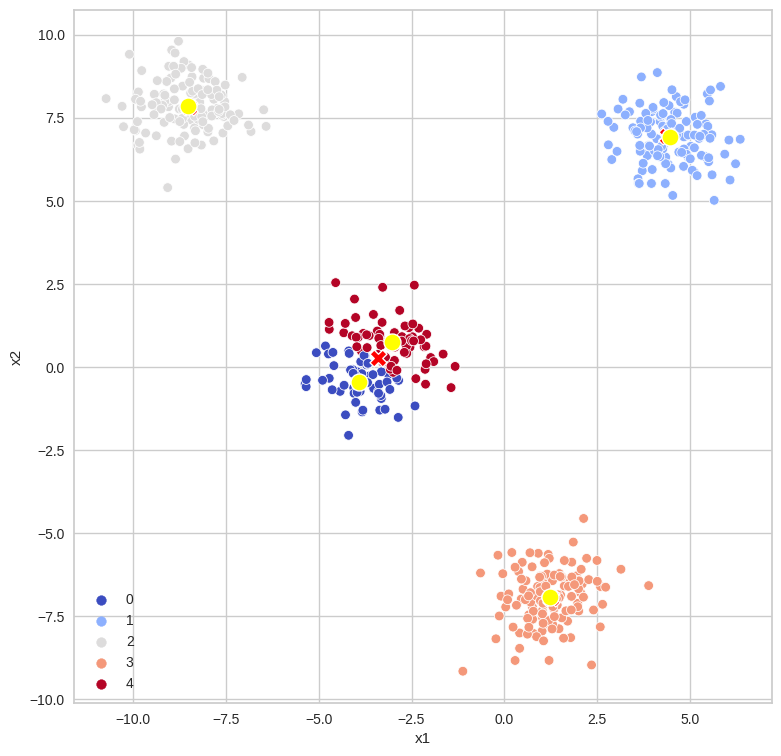

6


/home/garceseder2/anaconda3/envs/regresion_lineal/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


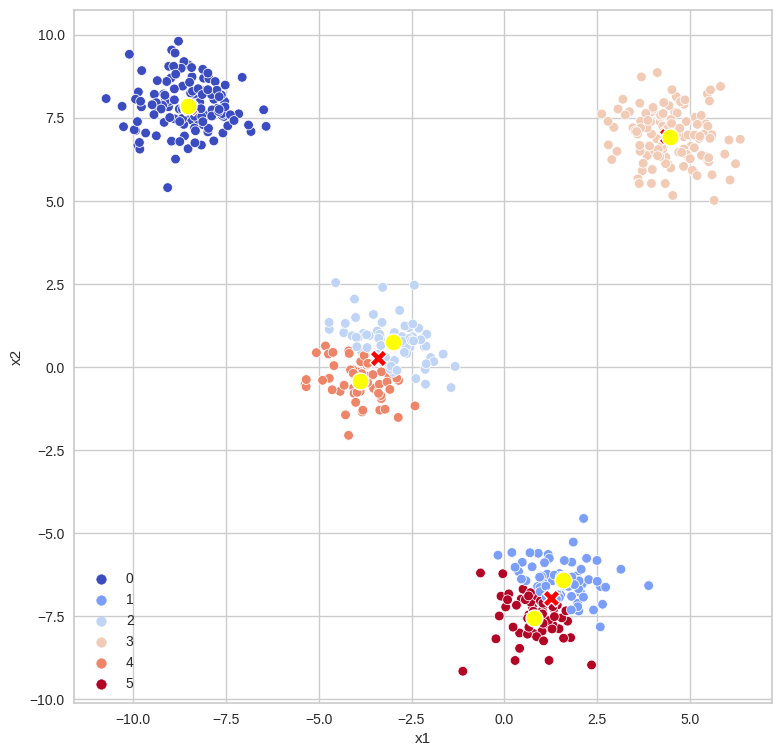

In [25]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

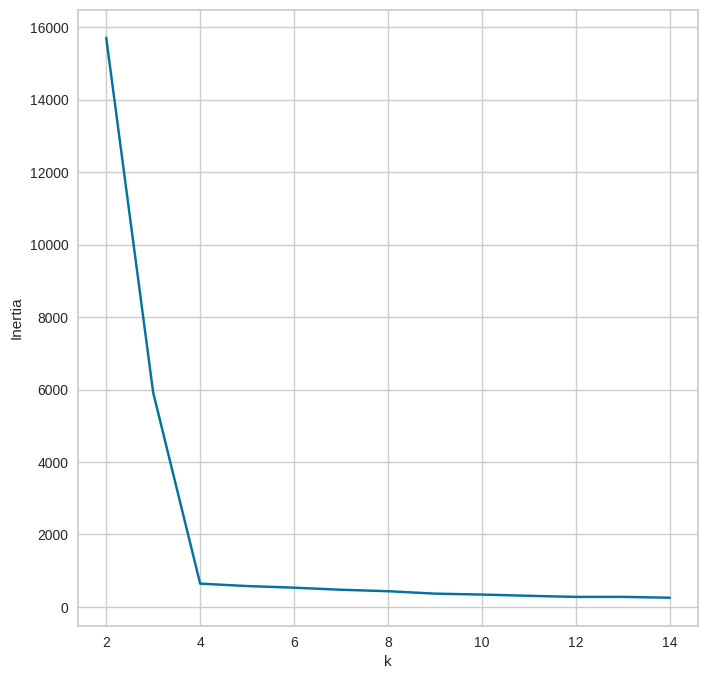

In [31]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


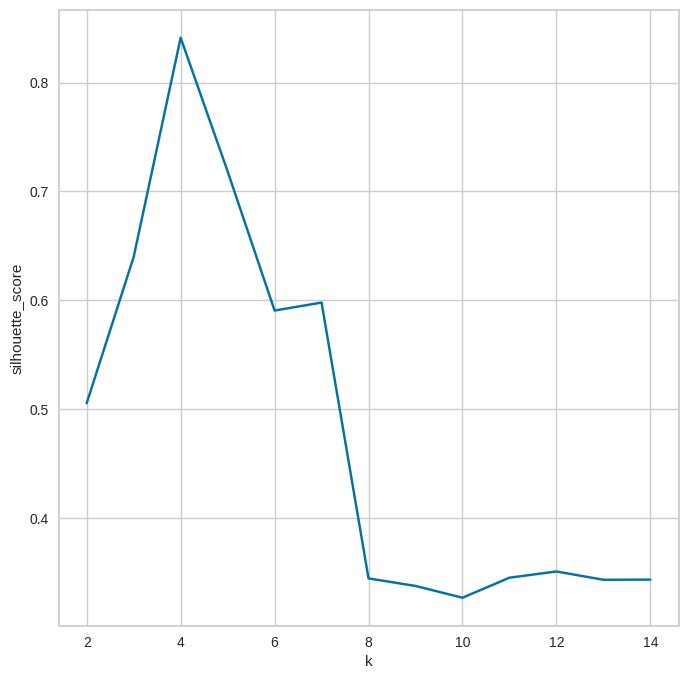

In [32]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

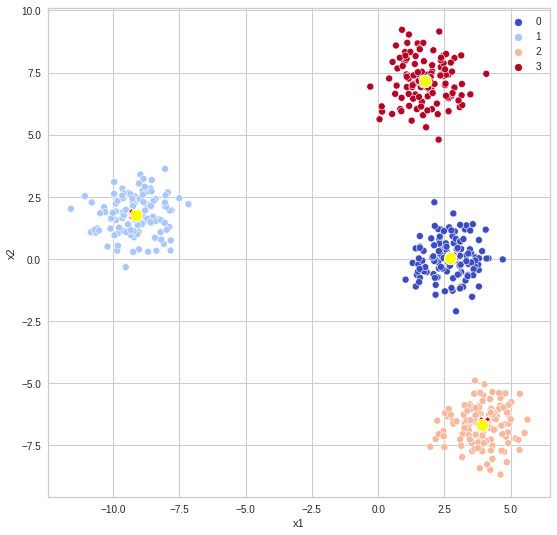

In [ ]:
vis_cluster(4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2e9a85d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

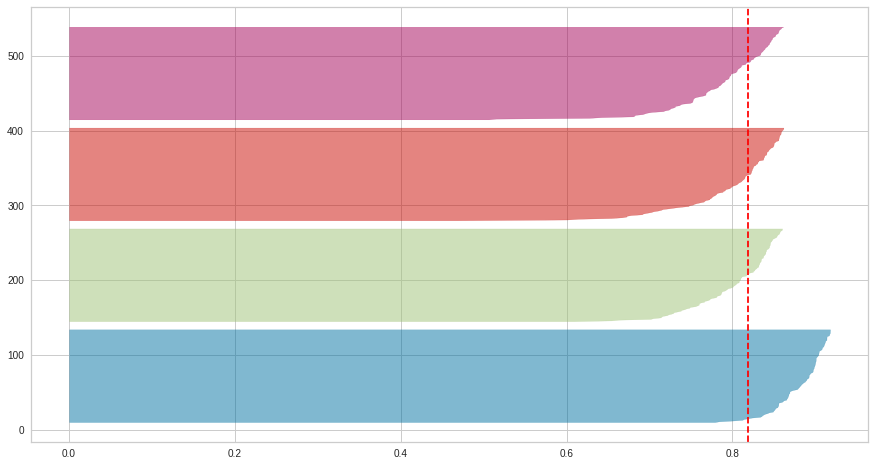

In [ ]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)